In [1]:
%env KERAS_BACKEND=tensorflow
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout,LSTM

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [3]:
x_train = sequence.pad_sequences(x_train, maxlen=180)
x_test = sequence.pad_sequences(x_test, maxlen=180)

In [4]:
model = Sequential()
model.add(Embedding(10000, 9))
model.add(LSTM(7))
model.add(Dropout(0.7))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 9)           90000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 7)                 476       
_________________________________________________________________
dropout_1 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 8         
Total params: 90,484
Trainable params: 90,484
Non-trainable params: 0
_________________________________________________________________


In [6]:
Model=model.fit(x_train, y_train, batch_size=32, epochs=8)

Instructions for updating:
Use tf.cast instead.
Epoch 1/8
25000/25000 [==============================] - 50s 2ms/step - loss: 0.5459 - acc: 0.7297
Epoch 2/8
25000/25000 [==============================] - 53s 2ms/step - loss: 0.3733 - acc: 0.8532
Epoch 3/8
25000/25000 [==============================] - 53s 2ms/step - loss: 0.3153 - acc: 0.8787
Epoch 4/8
25000/25000 [==============================] - 55s 2ms/step - loss: 0.2674 - acc: 0.8991
Epoch 5/8
25000/25000 [==============================] - 53s 2ms/step - loss: 0.2385 - acc: 0.9102
Epoch 6/8
25000/25000 [==============================] - 53s 2ms/step - loss: 0.2150 - acc: 0.9155
Epoch 7/8
25000/25000 [==============================] - 51s 2ms/step - loss: 0.1946 - acc: 0.9212
Epoch 8/8
25000/25000 [==============================] - 58s 2ms/step - loss: 0.1811 - acc: 0.9230


In [11]:
score = model.evaluate(x_test, y_test)
print('loss = ',score[0])
print('accurancy = ',score[1])

25000/25000 [==============================] - 8s 305us/step
loss =  0.46108401678085326
accurancy =  0.8528


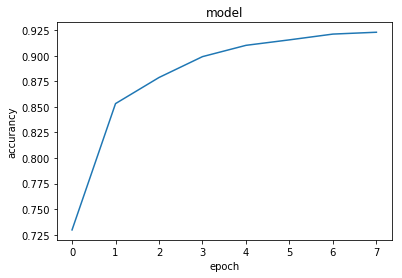

In [12]:
plt.plot(Model.history['acc'])
plt.title('model')
plt.xlabel('epoch')
plt.ylabel('accurancy')
plt.show()